In [1]:
%%capture
%run ./code.ipynb

### Decision Tree

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [48]:
dt_rgs = DecisionTreeRegressor()
dt_rgs.fit(X_train, y_train)
y_pred = dt_rgs.predict(X_test)
dt_rgs.score(X_test, y_test)

0.931976119292736

In [16]:
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('dt_rgs', dt_rgs)])
n_components = list(range(1, X_train.shape[1] + 1))

In [49]:
parameters = {
    "dt_rgs__splitter": ["best", "random"],
    "dt_rgs__max_depth": list(range(2, 14, 2)),
    "dt_rgs__min_samples_leaf": list(range(1, 10)),
}


In [50]:
gs = GridSearchCV(pipe, parameters)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()),
                                       ('dt_rgs', DecisionTreeRegressor())]),
             param_grid={'dt_rgs__max_depth': [2, 4, 6, 8, 10, 12],
                         'dt_rgs__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                         'dt_rgs__splitter': ['best', 'random']})

In [67]:
print('Best score: {}'.format(gs.best_score_))
print('Best params: {}'.format(gs.best_params_))
print('Best estimator: {}'.format(gs.best_estimator_))


Best score: 0.9359760813398023
Best params: {'dt_rgs__max_depth': 12, 'dt_rgs__min_samples_leaf': 9, 'dt_rgs__splitter': 'best'}
Best estimator: Pipeline(steps=[('pca', PCA()),
                ('dt_rgs',
                 DecisionTreeRegressor(max_depth=12, min_samples_leaf=9))])


In [52]:
gs_pred = gs.predict(X_test)

In [65]:
from sklearn import metrics


print('Without tuning:')
print('Accuracy: ', metrics.explained_variance_score(y_test, y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('\n')
print('With hyperparamater tuned:')
print('Accuracy: ', metrics.explained_variance_score(y_test, gs_pred))
print('MAE:', metrics.mean_absolute_error(y_test,gs_pred))
print('MSE:', metrics.mean_squared_error(y_test, gs_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gs_pred)))

Without tuning:
Accuracy:  0.9320244531263394
MAE: 1225.5419022516237
MSE: 3299564.317834393
RMSE: 1816.4702909308462


With hyperparamater tuned:
Accuracy:  0.9379360030879912
MAE: 1171.3285415917687
MSE: 3010514.7305414267
RMSE: 1735.0834938242674


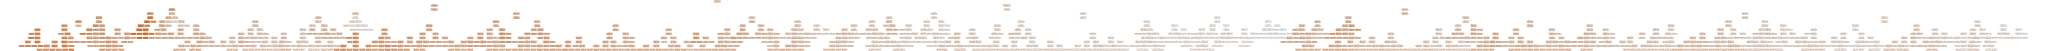

In [71]:
from sklearn.tree import export_graphviz
import graphviz
best_dt = DecisionTreeRegressor(max_depth=12,min_samples_leaf=9)
best_dt.fit(X_train, y_train)
dot_file = export_graphviz(best_dt,
                           out_file=None,
                           feature_names=all_columns,
                           filled=True,
                           rounded=True)
graphviz.Source(dot_file)